In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex1data1.txt'
data = pd.read_csv(data_path, header=None, names = ["x1", "y"])
data.head()

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.shape

(97, 2)

In [4]:
x1 = data['x1']
y = data['y']

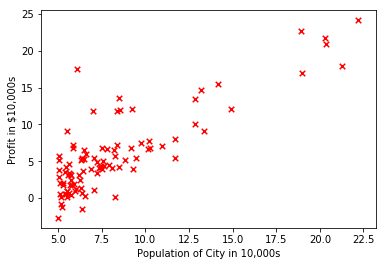

In [5]:
plt.scatter(x1,y,s=30,c='r',marker='x',linewidths=1)
plt.xlim(min(data['x1']-1),max(data['x1']+1))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [6]:
### Gradient Descent
m = data.shape[0]
def Cost(x,y,theta):
    J = 0
    h = x.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

data.insert(loc=0,column='x0',value=np.ones(m))
data.head()

,x0,x1,y
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


In [7]:
x = data[data.columns[0:data.shape[1]-1]]
n = data.shape[1]-1
y = data[data.columns[n:n+1]]
# convert to np.array
x = x.values
y = y.values

In [8]:
m = y.shape[0]
def Cost(x,y,theta):
    """
    Input: np.array
    Output: cost's value
    """
    h = x.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

In [9]:
theta_initial = np.array([[0],[0]])
Cost(x,y,theta_initial)

32.072733877455676

In [10]:
def gradientDescent(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha*(1/m)*(x.T.dot(h-y))
        J_history[iter] = Cost(x, y, theta)
    return(theta, J_history)

theta_initial = np.array([[0],[0]])
alpha = 0.01
iterations = 1500
theta, cost_history = gradientDescent(x,y,theta_initial,alpha,iterations)

In [11]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [12]:
cost_history

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

(0, 1500)

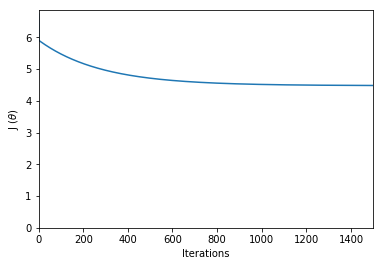

In [13]:
plt.plot(cost_history)
plt.ylabel('J' + ' (' + r'$\theta$' +')')
# or plt.ylabel('J' + ' (\u0398)' )
plt.xlabel('Iterations')
plt.ylim(ymin = 0)
plt.xlim(0,iterations)

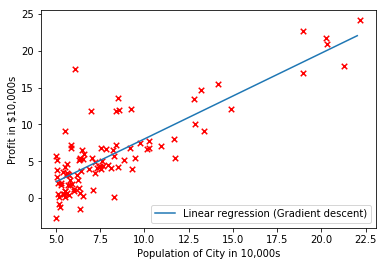

In [14]:
x_range = np.arange(min(data['x1']),max(data['x1']))
y_range = theta[0] + theta[1]*x_range
plt.scatter(x1,y,s=30,c='r',marker='x',linewidths=1)
plt.plot(x_range,y_range, label='Linear regression (Gradient descent)')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

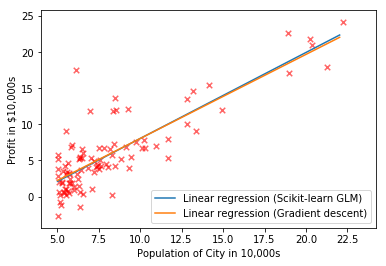

In [15]:
#Using Sklearn

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x[:,1].reshape(m,1),y)

plt.plot(x_range, (linreg.intercept_ + linreg.coef_*x_range).ravel(), label='Linear regression (Scikit-learn GLM)')

plt.scatter(x1,y,s=30,c='r',marker='x',linewidths=1, alpha=0.6)
plt.plot(x_range,y_range, label='Linear regression (Gradient descent)')

plt.xlim(min(data['x1']-1),max(data['x1']+2))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [16]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


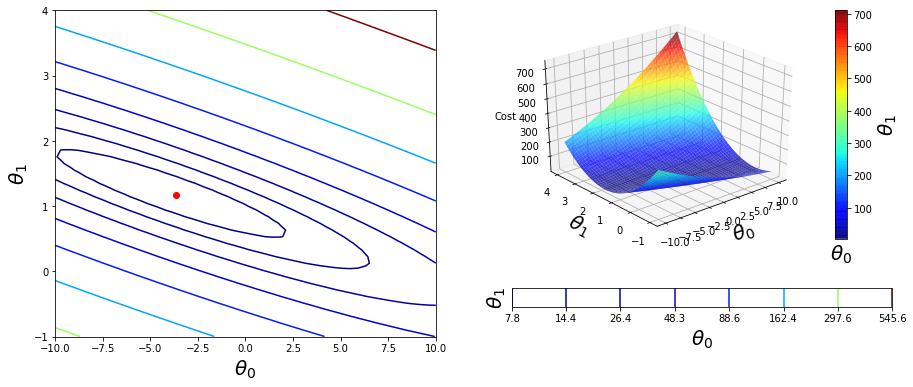

In [17]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = Cost(x,y, theta=[[xx[i,j]], [yy[i,j]]])

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')
plt.colorbar(CS,orientation='horizontal')

# Right plot
CS2 = ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.75, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=30, azim=230)
plt.colorbar(CS2, orientation='vertical')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=20)
    ax.set_ylabel(r'$\theta_1$', fontsize=20)